In [1]:
pip install sidrapy
pip install geopandas
pip install matplotlib
pip install seaborn
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import sidrapy as sy
import geopandas as gpd
import matplotlib as plt
import pandas as pd
import seaborn as sns

In [12]:
#get original dataframe
df_raw = sy.get_table(
    table_code='9514',
    ibge_territorial_code='all',
    territorial_level='6', # Minicipal
    variable='93' #total population
)
# update colum names with first record
df_raw.columns = df_raw.iloc[0]
# update dataframe with no first record 
df_raw = df_raw.iloc[1:]
df_raw.head()


,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Município (Código),Município,Variável (Código),Variável,Ano (Código),Ano,Sexo (Código),Sexo,Forma de declaração da idade (Código),Forma de declaração da idade,Idade (Código),Idade
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Município (Código),Município,Variável (Código),Variável,Ano (Código),Ano,Sexo (Código),Sexo,Forma de declaração da idade (Código),Forma de declaração da idade,Idade (Código),Idade
1,6,Município,45,Pessoas,21494,1100015,Alta Floresta D'Oeste - RO,93,População residente,2022,2022,6794,Total,113635,Total,100362,Total
2,6,Município,45,Pessoas,96833,1100023,Ariquemes - RO,93,População residente,2022,2022,6794,Total,113635,Total,100362,Total
3,6,Município,45,Pessoas,5351,1100031,Cabixi - RO,93,População residente,2022,2022,6794,Total,113635,Total,100362,Total
4,6,Município,45,Pessoas,86887,1100049,Cacoal - RO,93,População residente,2022,2022,6794,Total,113635,Total,100362,Total


In [30]:
# create new dataframe with population by municipal
df_population = df_raw.pivot_table(
    index={'Município (Código)', 'Município'},
    columns='Variável',
    values='Valor',
    aggfunc='max'
).reset_index()

df_population.head()


Variável,Município,Município (Código),População residente
0,Abadia de Goiás - GO,5200050,19128
1,Abadia dos Dourados - MG,3100104,6272
2,Abadiânia - GO,5200100,17232
3,Abaetetuba - PA,1500107,158188
4,Abaeté - MG,3100203,22675


In [27]:
# new visualization
# create new dataframe with population with filter
df_woman = sy.get_table(
    table_code='9514',
    ibge_territorial_code='all',
    territorial_level='6', # Minicipal
    variable='93', #total population
    classifications={
        "2": "5",
        "287": "9387"
    }
)
# update colum names with first record
df_woman.columns = df_raw.iloc[0]
# update dataframe with no first record 
df_woman = df_raw.iloc[1:]
df_woman.head()


,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Município (Código),Município,Variável (Código),Variável,Ano (Código),Ano,Sexo (Código),Sexo,Forma de declaração da idade (Código),Forma de declaração da idade,Idade (Código),Idade
2,6,Município,45,Pessoas,96833,1100023,Ariquemes - RO,93,População residente,2022,2022,6794,Total,113635,Total,100362,Total
3,6,Município,45,Pessoas,5351,1100031,Cabixi - RO,93,População residente,2022,2022,6794,Total,113635,Total,100362,Total
4,6,Município,45,Pessoas,86887,1100049,Cacoal - RO,93,População residente,2022,2022,6794,Total,113635,Total,100362,Total
5,6,Município,45,Pessoas,15890,1100056,Cerejeiras - RO,93,População residente,2022,2022,6794,Total,113635,Total,100362,Total
6,6,Município,45,Pessoas,15663,1100064,Colorado do Oeste - RO,93,População residente,2022,2022,6794,Total,113635,Total,100362,Total


In [36]:
path_sf = r'BR_Municipios_2022/BR_Municipios_2022.shp'
geo_df = gpd.read_file(path_sf)
geo_df.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.1191, -60.81773 -13.12..."


In [37]:
df_population.head()


Variável,Município,Município (Código),População residente
0,Abadia de Goiás - GO,5200050,19128
1,Abadia dos Dourados - MG,3100104,6272
2,Abadiânia - GO,5200100,17232
3,Abaetetuba - PA,1500107,158188
4,Abaeté - MG,3100203,22675


In [65]:
geo_df['CD_MUN'] = geo_df['CD_MUN'].astype(int) 
df_population['Município (Código)'] = df_population['Município (Código)'].astype(int) 
df_population['População residente'] = df_population['População residente'].astype(int) 

geo_df = geo_df.merge(
    df_population, 
    how='left', 
    left_on='CD_MUN',
    right_on='Município (Código)')

geo_df.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,Município_x,Município (Código)_x,População residente_x,Município_y,Município (Código)_y,População residente_y,Município,Município (Código),População residente
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...",Alta Floresta D'Oeste - RO,1100015.0,21494,Alta Floresta D'Oeste - RO,1100015.0,21494,Alta Floresta D'Oeste - RO,1100015.0,21494.0
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...",Ariquemes - RO,1100023.0,96833,Ariquemes - RO,1100023.0,96833,Ariquemes - RO,1100023.0,96833.0
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...",Cabixi - RO,1100031.0,5351,Cabixi - RO,1100031.0,5351,Cabixi - RO,1100031.0,5351.0
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...",Cacoal - RO,1100049.0,86887,Cacoal - RO,1100049.0,86887,Cacoal - RO,1100049.0,86887.0
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.1191, -60.81773 -13.12...",Cerejeiras - RO,1100056.0,15890,Cerejeiras - RO,1100056.0,15890,Cerejeiras - RO,1100056.0,15890.0


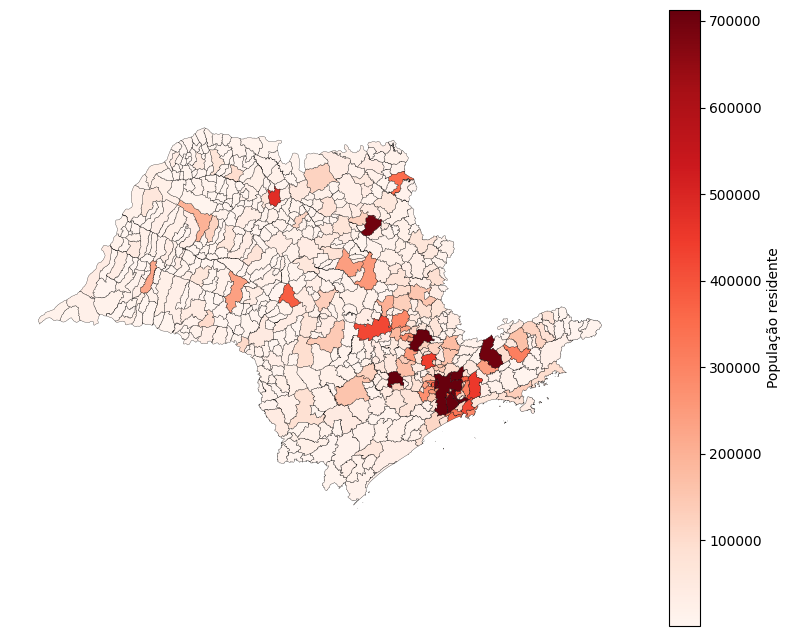

In [74]:
fig, ax = plt.pyplot.subplots(figsize=(10,8))





geo_df2 = geo_df[geo_df['SIGLA_UF'] == 'SP']

vmin, vmax = geo_df2['População residente'].min(), geo_df2['População residente'].quantile(.99)

# Create color degrade of municipal population 
colors = plt.pyplot.cm.Reds((geo_df2['População residente'] - vmin)/(vmax - vmin))

geo_df2.plot(ax = ax, color=colors, edgecolor='black', linewidth=0.2) 

# Create color scale
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.pyplot.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.pyplot.colorbar(sm, ax=ax)
cbar.set_label('População residente')


ax.axis('off')

plt.pyplot.show()